#📌 Extracción

In [26]:
import pandas as pd
import numpy as np

# Ruta del archivo JSON
ruta_json = '/content/TelecomX_Data.json'

# Intenta cargar el archivo usando varios encodings comunes
encodings = ['latin-1', 'ISO-8859-1', 'cp1252']
datos1 = None

for enc in encodings:
    try:
        datos1 = pd.read_json(ruta_json, encoding=enc)
        print(f'Archivo cargado exitosamente con codificación: {enc}')
        break
    except UnicodeDecodeError:
        continue
    except Exception as e:
        print(f"Error inesperado con codificación {enc}: {e}")

# Verifica que los datos hayan sido cargados
if datos1 is None:
    raise ValueError("No se pudo cargar el archivo JSON con las codificaciones comunes.")

# Normalización de columnas anidadas
datos_customer = pd.json_normalize(datos1['customer'])
datos_phone    = pd.json_normalize(datos1['phone'])
datos_internet = pd.json_normalize(datos1['internet'])
datos_account  = pd.json_normalize(datos1['account'])

# Combina todas las columnas en un solo DataFrame
datos = pd.concat([
    datos1[['customerID', 'Churn']],  # columnas principales
    datos_customer,
    datos_phone,
    datos_internet,
    datos_account
], axis=1)

# Información general del DataFrame resultante
print("✅ Datos cargados y normalizados correctamente")
print("Columnas disponibles:", datos.columns.tolist())
print("Dimensiones del DataFrame:", datos.shape)
print("\nInformación general:")
datos.info()

Archivo cargado exitosamente con codificación: latin-1
✅ Datos cargados y normalizados correctamente
Columnas disponibles: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']
Dimensiones del DataFrame: (7267, 21)

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   ten

#🔧 Transformación

#✅ 1. Limpieza y transformación del dataset

In [30]:
# Convertir 'Charges.Total' a tipo numérico (float64)
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce')

# Rellenar valores nulos en 'Charges.Total' con 0.0
datos['Charges.Total'] = datos['Charges.Total'].fillna(0)

# Reemplazar valores vacíos en 'Churn' por 'Yes'
datos['Churn'] = datos['Churn'].replace('', 'Yes')

#✅ 2. Análisis inicial de calidad de datos

In [31]:
# Mostrar información del DataFrame
print("\n📋 Información general:")
datos.info()

# Descripción estadística
print("\n📊 Estadísticas descriptivas:")
print(datos.describe())

# Verificar valores nulos
print("\n🔍 Valores nulos por columna:")
print(datos.isnull().sum())

# Distribución de la columna 'tenure'
print("\n📌 Distribución de tenure:")
print(datos.groupby(['tenure'])['tenure'].count())

# Verificar registros con tenure = 0
print("\n🔎 Registros con tenure = 0:")
print(datos.loc[datos['tenure'] == 0, ['tenure', 'Charges.Total']])

# Verificar si hay duplicados
print("\n📎 Registros duplicados:")
print(datos.duplicated().sum())


📋 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          

#✅ 3. Creación de la variable Cuentas_Diarias

In [32]:
# Verificar que existe la columna Charges.Monthly y crear columna diaria
if 'Charges.Monthly' in datos.columns:
    datos['Cuentas_Diarias'] = datos['Charges.Monthly'] / 30
else:
    raise ValueError("La columna 'Charges.Monthly' no se encuentra en el DataFrame.")

#✅ 4. Conversión de valores textuales a numéricos (1/0)

In [33]:
# Columnas binarias a convertir (Sí/No -> 1/0)
cols_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in cols_binarias:
    if col in datos.columns:
        datos[col] = datos[col].map({'Yes': 1, 'No': 0})

#✅ 5. Renombramiento de columnas

In [34]:
datos = datos.rename(columns={
    'Churn': 'Evasion',
    'MonthlyCharges': 'Facturacion_Mensual',
    'TotalCharges': 'Facturacion_Total',
    'tenure': 'Antiguedad_Meses',
    'Cuentas_Diarias': 'Facturacion_Diaria'
})

#✅ Resumen Final

In [35]:
print("\n✅ Datos listos para análisis. Columnas disponibles:")
print(datos.columns.tolist())

print("\n📏 Tamaño final del DataFrame:", datos.shape)

print("\n🔍 Primeras filas del dataset:")
print(datos.head())


✅ Datos listos para análisis. Columnas disponibles:
['customerID', 'Evasion', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Antiguedad_Meses', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Facturacion_Diaria']

📏 Tamaño final del DataFrame: (7267, 22)

🔍 Primeras filas del dataset:
   customerID  Evasion  gender  SeniorCitizen  Partner  Dependents  \
0  0002-ORFBO        0  Female              0        1           1   
1  0003-MKNFE        0    Male              0        0           0   
2  0004-TLHLJ        1    Male              0        0           0   
3  0011-IGKFF        1    Male              1        1           0   
4  0013-EXCHZ        1  Female              1        1           0   

   Antiguedad_Meses  PhoneService MultipleLines InternetService  ...  \
0                 9  

#📊 Carga y análisis

#✅ ANÁLISIS EXPLORATORIO DE DATOS (EDA) PARA EVASION

##🔹 1. Preparar ambiente y separar datos por Evasion

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo de los gráficos
sns.set(style="whitegrid")

# Separar datos en contratos terminados y vigentes
datos_terminados = datos[datos['Evasion'] == 1]
datos_vigentes = datos[datos['Evasion'] == 0]

##🔹 2. Análisis descriptivo básico

In [37]:
# Medidas estadísticas generales
print("\n📊 Estadísticas generales:")
print(datos.describe())

# Medidas por grupo de Evasion
print("\n📉 Estadísticas por Evasion:")
print(datos.groupby('Evasion')[['SeniorCitizen', 'Antiguedad_Meses', 'PhoneService', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total', 'Facturacion_Diaria']].agg(['mean', 'median', 'std']))


📊 Estadísticas generales:
           Evasion  SeniorCitizen      Partner   Dependents  Antiguedad_Meses  \
count  7267.000000    7267.000000  7267.000000  7267.000000       7267.000000   
mean      0.288014       0.162653     0.484106     0.300124         32.346498   
std       0.452869       0.369074     0.499782     0.458343         24.571773   
min       0.000000       0.000000     0.000000     0.000000          0.000000   
25%       0.000000       0.000000     0.000000     0.000000          9.000000   
50%       0.000000       0.000000     0.000000     0.000000         29.000000   
75%       1.000000       0.000000     1.000000     1.000000         55.000000   
max       1.000000       1.000000     1.000000     1.000000         72.000000   

       PhoneService  PaperlessBilling  Charges.Monthly  Charges.Total  \
count   7267.000000       7267.000000      7267.000000    7267.000000   
mean       0.902711          0.593230        64.720098    2277.182035   
std        0.296371     

##🔹 3. Proporción de evasión

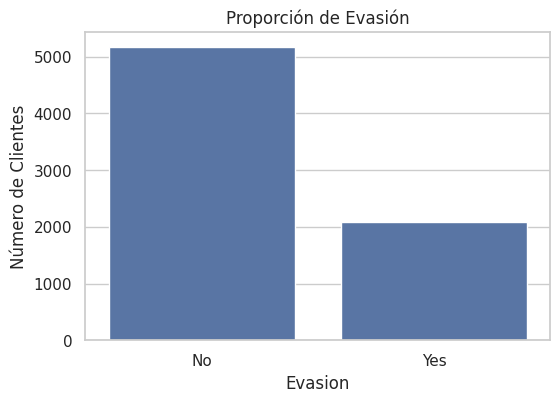

In [38]:
# Gráfico de proporción de Evasion
plt.figure(figsize=(6,4))
sns.countplot(data=datos, x='Evasion')
plt.title("Proporción de Evasión")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("Número de Clientes")
plt.xlabel("Evasion")
plt.show()

#📊 ANÁLISIS CATEGÓRICO VS CHURN

##🔹 4. Evasion por Género

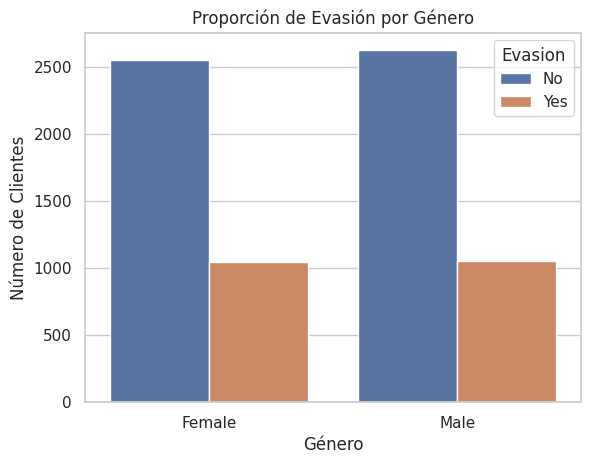

In [40]:
sns.countplot(data=datos, x="gender", hue="Evasion")
plt.title("Proporción de Evasión por Género")
plt.ylabel("Número de Clientes")
plt.xlabel("Género")
plt.legend(title="Evasion", labels=["No", "Yes"])
plt.show()

#🔹 5. Evasion por Grupo Etario (SeniorCitizen)

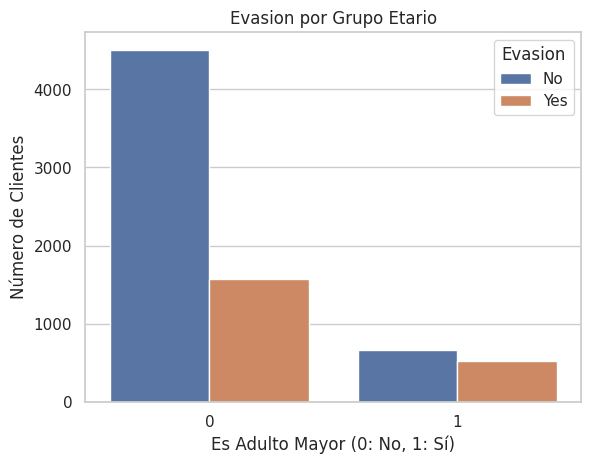

In [42]:
sns.countplot(data=datos, x="SeniorCitizen", hue="Evasion")
plt.title("Evasion por Grupo Etario")
plt.xlabel("Es Adulto Mayor (0: No, 1: Sí)")
plt.ylabel("Número de Clientes")
plt.legend(title="Evasion", labels=["No", "Yes"])
plt.show()

##🔹 6. Evasion por Pareja (Partner)

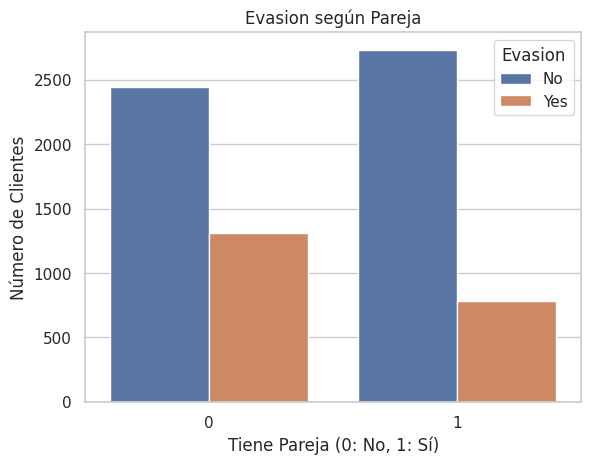

In [43]:
sns.countplot(data=datos, x="Partner", hue="Evasion")
plt.title("Evasion según Pareja")
plt.xlabel("Tiene Pareja (0: No, 1: Sí)")
plt.ylabel("Número de Clientes")
plt.legend(title="Evasion", labels=["No", "Yes"])
plt.show()

##🔹 7. Evasion por Dependientes

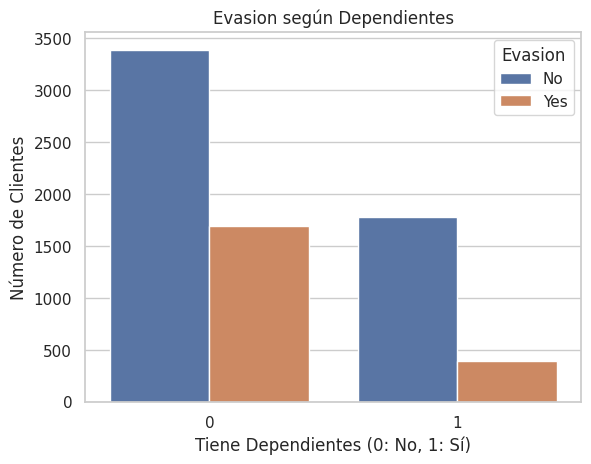

In [44]:
sns.countplot(data=datos, x="Dependents", hue="Evasion")
plt.title("Evasion según Dependientes")
plt.xlabel("Tiene Dependientes (0: No, 1: Sí)")
plt.ylabel("Número de Clientes")
plt.legend(title="Evasion", labels=["No", "Yes"])
plt.show()

##🔹 8. Evasion por Tipo de Contrato

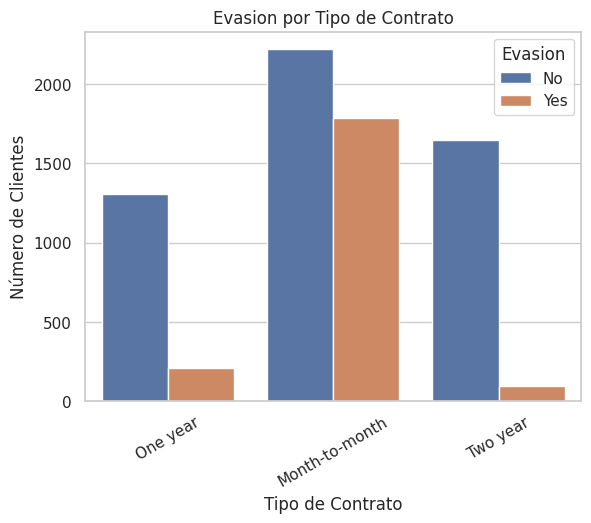

In [45]:
sns.countplot(data=datos, x="Contract", hue="Evasion")
plt.title("Evasion por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=30)
plt.legend(title="Evasion", labels=["No", "Yes"])
plt.show()

##🔹 9. Churn por Método de Pago

#📄Informe final